D:\Users\ouyangqq\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['simSun'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


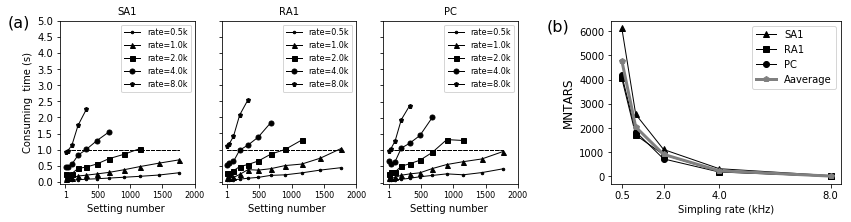

In [2]:
import ultils as alt
import Receptors as receptorlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
filepath='saved_figs/'

def plot_f1(clolor_buf,marker_buf):
    for j in range(len(ttype)):
        plt.subplot(1,len(ttype)+2,j+1) 
        plt.title(type_buf[j], fontsize=10)
        for i in range(srate.size):
            Tc_buf1[j,i,:]=np.mean(Tc_buf[j,i,:,:],axis=1)
            Ter_buf1[j,i,:]=np.std(Tc_buf[j,i,:,:],axis=1)
            max_s=len(num)
            if(srate[i]==2):max_s=len(num)-2
            if(srate[i]==4):max_s=len(num)-4
            elif(srate[i]==8):max_s=len(num)-6  
            #,yerr=Ter_buf1[j,i,0:max_s]
            plt.plot(num[0:max_s],Tc_buf1[j,i,0:max_s],label=u'rate='+str(srate[i])+'k',color=clolor_buf[j],marker=marker_buf[i],linewidth=1,markersize=5)
            plt.plot(num,np.ones(len(num)),'k--',linewidth=1)

        plt.xticks([1,500,1000,1500,2000],fontsize=8)  
        plt.yticks([0,0.5,1.0,1.5,2.0,2.5,3,3.5,4,4.5,5])
        if(j>0):plt.yticks([0,0.5,1.0,1.5,2.0,2.5,3,3.5,4,4.5,5],color='none')
        #plt.xscale('log')
        plt.xlabel(u"Setting number ", fontsize=10)
        if(j==0):
            plt.ylabel(u"Consuming  time (s)", fontsize=10)
            plt.text(-900,4.8,"(a)",fontsize=16)
        plt.legend(loc=0,prop={'family':'simSun','size':8}) 
        #plt.savefig('ctc.png',bbox_inches='tight', dpi=300)

def plot_f2(clolor_buf,marker_buf,type_buf):
    for j in range(len(ttype)):  
        for srate_c in range(len(srate)):
            A=np.abs(Tc_buf1[j,srate_c,:]-1)
            ct=Tc_buf1[j,srate_c,np.where(A==np.min(A))]
            count=num[np.where(A==np.min(A))]
            Tc_buf2[j,srate_c]=count/ct           
        Ter_buf2[j,:]=np.std(np.mean(num)/Tc_buf1[j,:,:],axis=1)
        plt.plot(srate,Tc_buf2[j,:],label=type_buf[j],color=clolor_buf[j],linewidth=1,marker=marker_buf[j+1],markersize=6)
    plt.xticks([0.5,2,4,8]) 
    plt.plot(srate,np.mean(Tc_buf2[:,:],axis=0),label='Aaverage',color='gray',linewidth=3,marker=marker_buf[4],markersize=6)
    plt.xlabel(u"Simpling rate (kHz)", fontsize=10)
    plt.ylabel(u"MNTARS", fontsize=12)
    plt.text(-2.2,6000,"(b)",fontsize=16)
    plt.legend(loc=0,prop={'family':'simSun','size':10}) 
    #plt.savefig('ctc.png',bbox_inches='tight', dpi=300)

ttype=['SA1','RA1','PC']

srate=np.array([0.5,1,2,4,8])
repeats=3
#num=[2*2,6*6,10*10,14*14,18*18,22*22]
num=np.array([2*2,6*6,10*10,14*14,18*18,22*22,26*26,30*30,34*34,38*38,42*42])

# Acquiring consuming time to evaluate Computational efficiency
Tc_buf=np.zeros([len(ttype),len(srate),len(num),repeats])
for type_c in range(len(ttype)):
    for srate_c in range(len(srate)):
        for num_c in range(len(num)):
            for repeat_c in range(repeats):
                tsensor=receptorlib.tactile_receptors(Ttype=ttype[type_c],simTime=1,sample_rate=srate[srate_c]*1000,sample_num=num[num_c])
                intentation=100*1e-6 #um
                tsensor.stimulus[:,:]=np.tile(receptorlib.sin_wave(tsensor.t,2*np.pi*100,intentation),(num[num_c],1))
                Tc_buf[type_c,srate_c,num_c,repeat_c]=tsensor.tactile_units_simulating(tsensor.stimulus) 
np.save('data/timeliness_buf.npy',Tc_buf) 


Tc_buf=np.load("data/timeliness_buf.npy")
Tc_buf1=np.zeros(Tc_buf[:,:,:,0].shape)  
Ter_buf1=np.zeros(Tc_buf[:,:,:,0].shape)  
Tc_buf2=np.zeros(Tc_buf[:,:,0,0].shape)  
Ter_buf2=np.zeros(Tc_buf[:,:,0,0].shape)

plt.figure(figsize=(14,3))
color_bf=['k','k','k','k']
marker_buf=['.-','^-','s-','o-','p-'] 

marker_buf1=['.','^','s','o','p'] 

type_buf=['SA1','RA1','PC']

plot_f1(color_bf,marker_buf1)


plt.subplot(1,len(ttype),len(ttype))
plot_f2(color_bf,marker_buf1,type_buf)

filepath='saved_figs/'
plt.savefig(filepath+'MNT.png',bbox_inches='tight', dpi=300)

